In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")
print("Path to dataset files:", path)

import pandas as pd
import numpy as np

/mnt/c/Users/kkiko/Desktop/TAA/projs/FAA_P1/.venvWSL/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /root/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1


In [3]:
train_df = pd.read_csv(path + "/sign_mnist_train.csv")
test_df = pd.read_csv(path + "/sign_mnist_test.csv")
print(train_df.shape[0] , test_df.shape[0])

27455 7172


In [4]:
y_train = train_df["label"]
y_test = test_df["label"]

X_train = train_df.drop("label", axis=1)
X_test = test_df.drop("label", axis=1)
X_train = X_train / 255
X_test = X_test / 255
X_train = np.array(X_train)
X_test = np.array(X_test)

In [5]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [11]:
# Train a simple MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def build_mlp(hidden_layer_sizes,solver='sgd'):
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes, 
        max_iter=1000, 
        alpha=1e-4,
        solver=solver, 
        verbose=10, 
        tol=1e-4, 
        random_state=1,
        learning_rate_init=.01,
        learning_rate='adaptive',
        activation='relu',
    )
    return model

def train_mlp(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def classify(model):
    # draw loss curve 
    plt.figure(figsize=(16, 9))
    plt.plot(model.loss_curve_)

    # print accuracy and f1 score in percentage
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    print("Accuracy: ", accuracy)
    print("F1 score: ", f1)

    # plot confusion matrix
    y_pred = model.predict(X_test)
    y_test_label = np.argmax(y_test, axis=1)  # Convert to label indicator format
    y_pred_label = np.argmax(y_pred, axis=1)  # Convert to label indicator format
    cm = confusion_matrix(y_test_label, y_pred_label)
    plt.figure(figsize=(16, 9))
    plt.matshow(cm)
    plt.show()

def pipeline(*args):
    model = build_mlp(*args)
    model = train_mlp(model, X_train, y_train)
    classify(model)
    return model

Iteration 1, loss = 3.99718070
Iteration 2, loss = 2.90412666
Iteration 3, loss = 2.41082993
Iteration 4, loss = 2.06774464
Iteration 5, loss = 1.80475950
Iteration 6, loss = 1.59329353
Iteration 7, loss = 1.42309699
Iteration 8, loss = 1.28023754
Iteration 9, loss = 1.15586227
Iteration 10, loss = 1.05046963
Iteration 11, loss = 0.95685760
Iteration 12, loss = 0.87458786
Iteration 13, loss = 0.79661252
Iteration 14, loss = 0.72616098
Iteration 15, loss = 0.67015425
Iteration 16, loss = 0.61243441
Iteration 17, loss = 0.56548460
Iteration 18, loss = 0.52103734
Iteration 19, loss = 0.47828055
Iteration 20, loss = 0.44321783
Iteration 21, loss = 0.40841827
Iteration 22, loss = 0.37734323
Iteration 23, loss = 0.34969342
Iteration 24, loss = 0.32579817
Iteration 25, loss = 0.30345212
Iteration 26, loss = 0.28177108
Iteration 27, loss = 0.26441349
Iteration 28, loss = 0.24736988
Iteration 29, loss = 0.23101105
Iteration 30, loss = 0.21604330
Iteration 31, loss = 0.20337587
Iteration 32, los

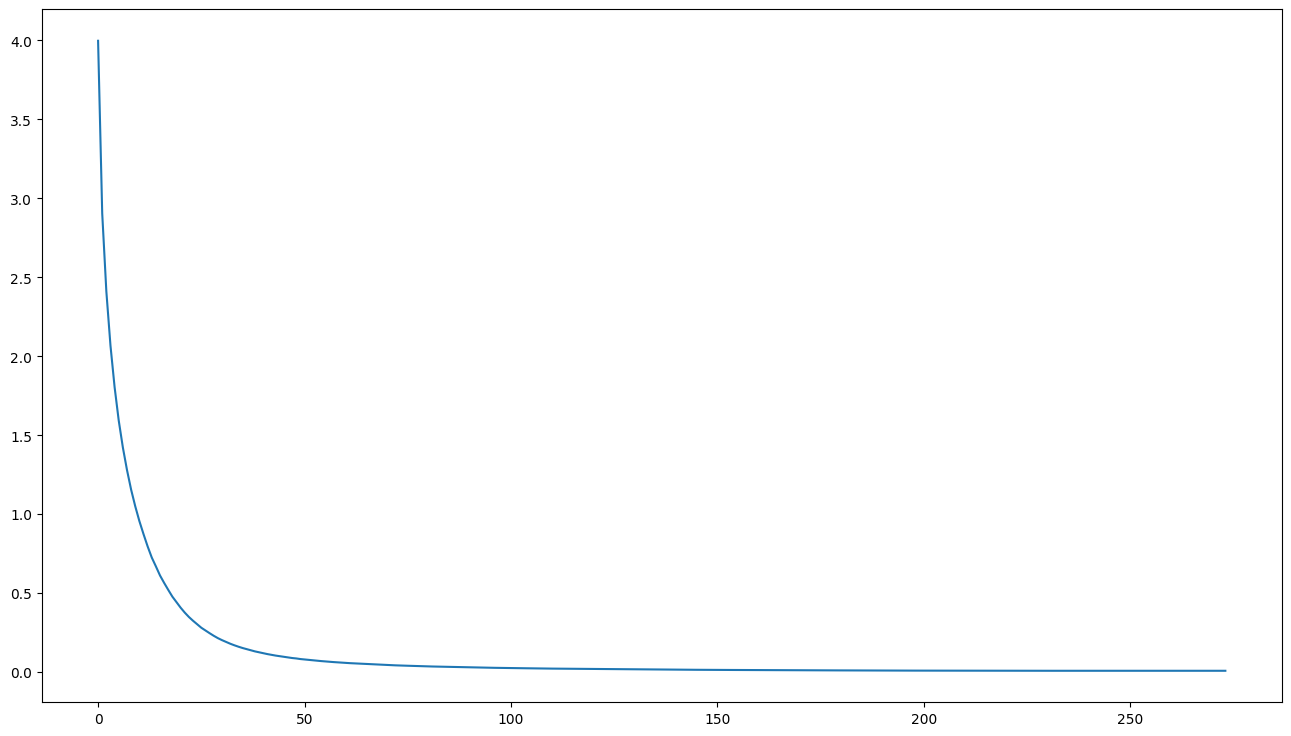

<Figure size 1600x900 with 0 Axes>

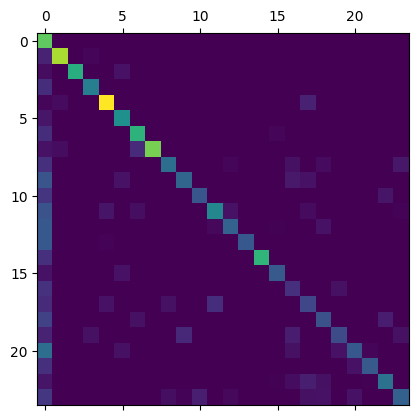

In [6]:
m1 = pipeline((100,))

Iteration 1, loss = 4.68854550
Iteration 2, loss = 3.93388795
Iteration 3, loss = 3.70981012
Iteration 4, loss = 3.58563452
Iteration 5, loss = 3.48489293
Iteration 6, loss = 3.39067534
Iteration 7, loss = 3.30672291
Iteration 8, loss = 3.20907436
Iteration 9, loss = 3.08132222
Iteration 10, loss = 3.00160247
Iteration 11, loss = 2.90169817
Iteration 12, loss = 2.80916759
Iteration 13, loss = 2.73988457
Iteration 14, loss = 2.68402693
Iteration 15, loss = 2.58279242
Iteration 16, loss = 2.51779742
Iteration 17, loss = 2.42640649
Iteration 18, loss = 2.37381713
Iteration 19, loss = 2.25904147
Iteration 20, loss = 2.17915375
Iteration 21, loss = 2.11804955
Iteration 22, loss = 2.07090419
Iteration 23, loss = 2.01835437
Iteration 24, loss = 1.97967652
Iteration 25, loss = 1.94600619
Iteration 26, loss = 1.88251464
Iteration 27, loss = 1.79439700
Iteration 28, loss = 1.78479889
Iteration 29, loss = 1.75061678
Iteration 30, loss = 1.65797947
Iteration 31, loss = 1.66543430
Iteration 32, los

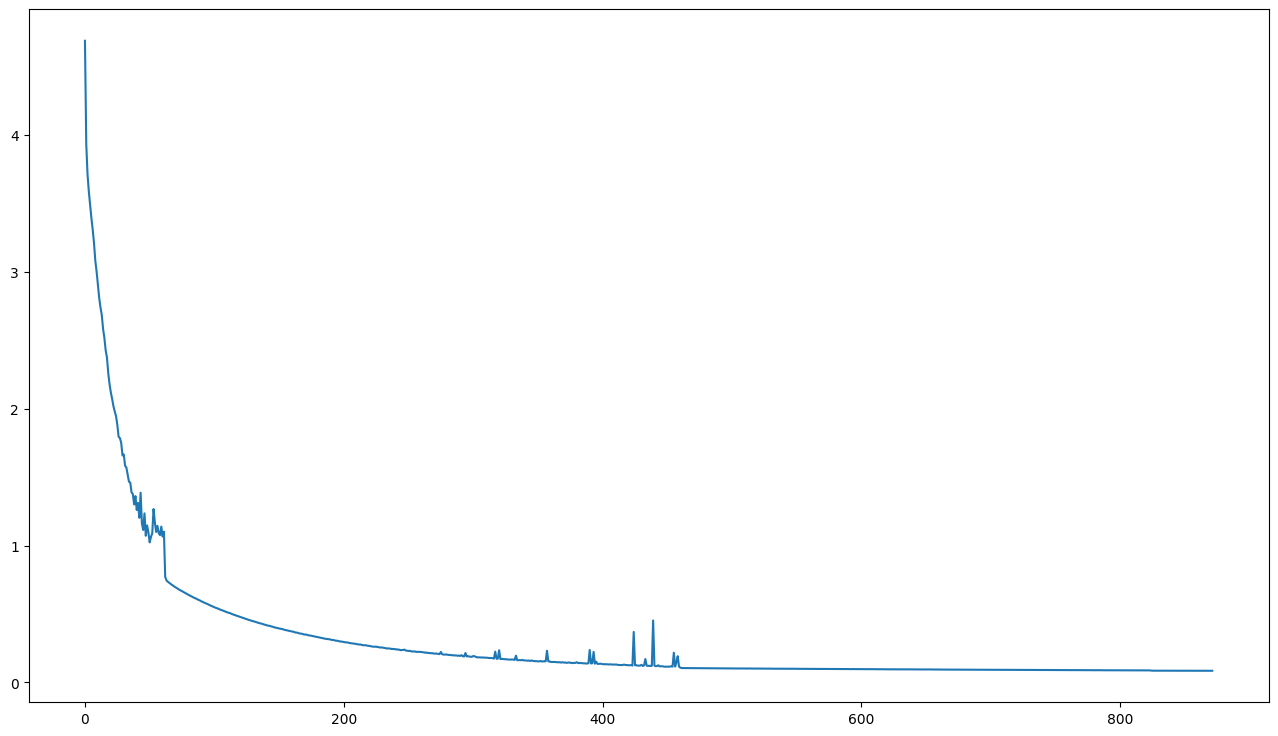

<Figure size 1600x900 with 0 Axes>

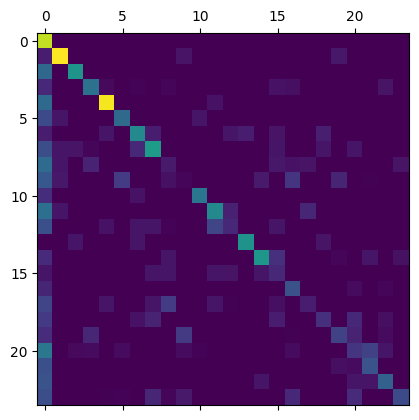

MLPClassifier(hidden_layer_sizes=(25, 10), learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=1000, random_state=1,
              solver='sgd', verbose=10)

In [7]:
pipeline((80,10))

# Tensorflow NN

In [7]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-11-26 23:58:13.747841: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-26 23:58:17.683436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732665499.296312   61217 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732665499.318329   61217 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 23:58:23.281971: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Num GPUs Available:  1


In [8]:
# make pipeline with tensorflow

EPOCHS = 150
def build_mlp_tf(hidden_layer_sizes):
    model = tf.keras.Sequential()    
    model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)))
    for size in hidden_layer_sizes:
        model.add(tf.keras.layers.Dense(size, activation=tf.nn.relu , kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.Dense(24, activation=tf.nn.softmax))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def train_mlp_tf(model, X_train, y_train):
    history = model.fit(X_train, y_train, epochs=EPOCHS , validation_data = (X_test, y_test))
    return model , history

def classify(model, history):
    # draw loss curve 
    plt.figure(figsize=(16, 9))
    epochs = [i for i in range(EPOCHS)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(16,9)

    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
    ax[1].set_title('Testing Accuracy & Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")

    # print accuracy and f1 score in percentage
    y_pred = model.predict(X_test)
    accuracy = model.evaluate(X_test, y_test)[1]
    y_pred_label = np.argmax(y_pred, axis=1)  # Convert to label indicator format
    y_test_label = np.argmax(y_test, axis=1)  # Convert to label indicator format
    f1 = f1_score(y_test_label, y_pred_label, average='macro')
    print("Accuracy: ", accuracy)
    print("F1 score: ", f1)

    # plot confusion matrix
    cm = confusion_matrix(y_test_label, y_pred_label)
    plt.figure(figsize=(16, 9))
    plt.matshow(cm)
    plt.show()

def pipeline_tf(*args):
    model = build_mlp_tf(*args)
    model , history = train_mlp_tf(model, X_train, y_train)
    classify(model, history)
    return model , history

In [1]:
model_tf , history_tf = pipeline_tf((100,50)) # MUCH BIGGER SIZE

NameError: name 'pipeline_tf' is not defined

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.05, # Randomly zoom image 
        width_shift_range=0.07,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.07,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

EPOCHS = 100

X_train_images = X_train.reshape(-1,28,28,1)
X_test_images = X_test.reshape(-1,28,28,1)
datagen.fit(X_train_images)

model_tf_datagen = tf.keras.Sequential()    
model_tf_datagen.add(tf.keras.layers.Flatten(input_shape=( 28, 28, 1)))
for size in (256,128):
    model_tf_datagen.add(tf.keras.layers.Dense(size, activation=tf.nn.relu))
model_tf_datagen.add(tf.keras.layers.Dense(24, activation=tf.nn.softmax))
model_tf_datagen.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model_tf_datagen.summary()
history_tf_datagen = model_tf_datagen.fit(datagen.flow(X_train_images, y_train, batch_size=128), epochs=EPOCHS , validation_data = (X_test_images, y_test), callbacks = [learning_rate_reduction])

/mnt/c/Users/kkiko/Desktop/TAA/projs/FAA_P1/.venvWSL/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1732665561.479837   61217 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13499 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/mnt/c/Users/kkiko/Desktop/TAA/projs/FAA_P1/.venvWSL/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732665566.410900   63052 service.cc:148] XLA service 0x7fc8140071b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732665566.411727   63052 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2024-11-26 23:59:26.727295: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732665567.205307   63052 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-26 23

 14/215 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0522 - loss: 3.2981

I0000 00:00:1732665569.120605   63052 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


178/215 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1434 - loss: 2.9341

2024-11-26 23:59:31.955107: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_156', 12 bytes spill stores, 12 bytes spill loads

2024-11-26 23:59:32.310027: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_322', 452 bytes spill stores, 452 bytes spill loads

2024-11-26 23:59:32.564064: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_322', 100 bytes spill stores, 104 bytes spill loads

2024-11-26 23:59:32.610814: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_322', 24 bytes spill stores, 24 bytes spill loads

2024-11-26 23:59:32.766260: I external/local_xla/xla/stream_

215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.1609 - loss: 2.8686 - val_accuracy: 0.4601 - val_loss: 1.7937 - learning_rate: 0.0010
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4200 - loss: 1.8517 - val_accuracy: 0.5082 - val_loss: 1.4806 - learning_rate: 0.0010
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5060 - loss: 1.5595 - val_accuracy: 0.5898 - val_loss: 1.2669 - learning_rate: 0.0010
Epoch 4/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5633 - loss: 1.3676 - val_accuracy: 0.6263 - val_loss: 1.1087 - learning_rate: 0.0010
Epoch 5/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6261 - loss: 1.1779 - val_accuracy: 0.6700 - val_loss: 0.9700 - learning_rate: 0.0010
Epoch 6/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6654 - loss: 1.0485 - val_accuracy: 0.7012 - val_loss: 0.9004 - learning_rate: 0.0010
Epoch 7/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7046 - loss: 0.9210

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8986 - loss: 0.3422
Accuracy:  0.9028165340423584
F1 score:  0.8942979703090641


<Figure size 1600x900 with 0 Axes>

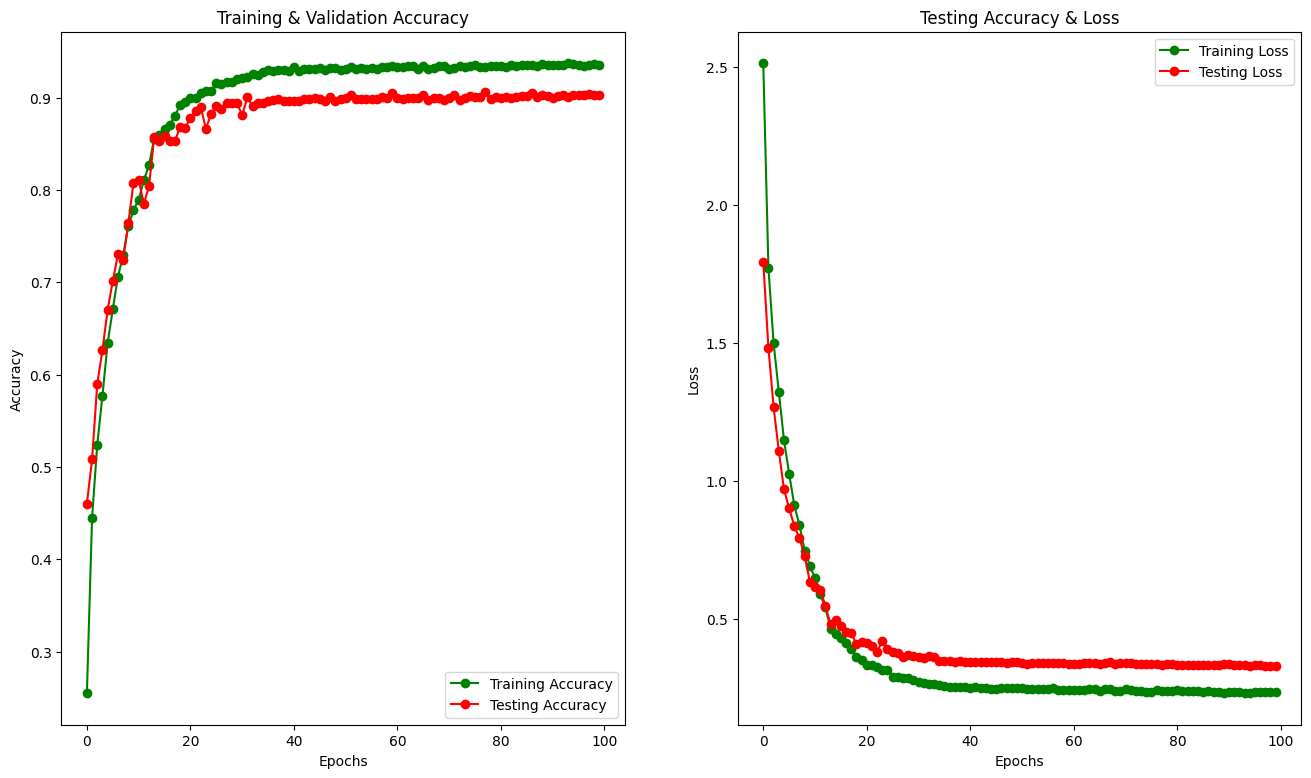

<Figure size 1600x900 with 0 Axes>

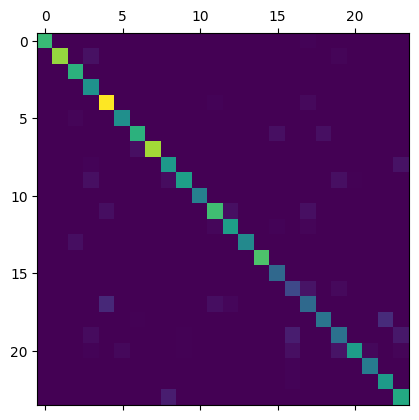

In [12]:
plt.figure(figsize=(16, 9))
epochs = [i for i in range(EPOCHS)]
fig , ax = plt.subplots(1,2)
train_acc = history_tf_datagen.history['accuracy']
train_loss = history_tf_datagen.history['loss']
val_acc = history_tf_datagen.history['val_accuracy']
val_loss = history_tf_datagen.history['val_loss']
fig.set_size_inches(16,9)
ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
# print accuracy and f1 score in percentage
y_pred = model_tf_datagen.predict(X_test_images)
accuracy = model_tf_datagen.evaluate(X_test_images, y_test)[1]
y_pred_label = np.argmax(y_pred, axis=1)  # Convert to label indicator format
y_test_label = np.argmax(y_test, axis=1)  # Convert to label indicator format
f1 = f1_score(y_test_label, y_pred_label, average='macro')
print("Accuracy: ", accuracy)
print("F1 score: ", f1)
# plot confusion matrix
cm = confusion_matrix(y_test_label, y_pred_label)
plt.figure(figsize=(16, 9))
plt.matshow(cm)
plt.show()